In [1]:
import numpy as np

from src.data import generate_periodic_function
from src.plotting import plot_2d_function
from src.RBF_network import RBFNetwork

img_path = 'img/'

# First part of the assignment of ANNDA lab 2
## 3.1 Batch mode training using least squares - supervised learning of network weights

In this simple assignment, you should focus on supervised learning of weights
of the RBF network built to address a simple regression problem. Please implement rst batch learning from scratch without using dedicated NN toolboxes.
The two function to approximare are sin(2x) and square(2x) (square is a rectangular curve serving as a "box" envelope for the sine wave, i.e. it is 1 for
arguments where the sin>=0 and -1 otherwise). Note that the input space is
R, so each pattern x1, x2, . . . , xN in (6) is in fact a scalar. Begin by creating
a column vector containing the points (patterns) where you want to evaluate
your function. Let's limit the regression to the interval [0, 2π]. Sample this
interval starting from 0 with the step size of 0.1 and calculate the values of
the two functions at the these points to obtain the corresponding training sets.
The testing sets could be generated analogously with sampling starting from
0.05 and the same step size.

In [2]:
sin_df = generate_periodic_function(function='sin')
square_df = generate_periodic_function(function= 'square')

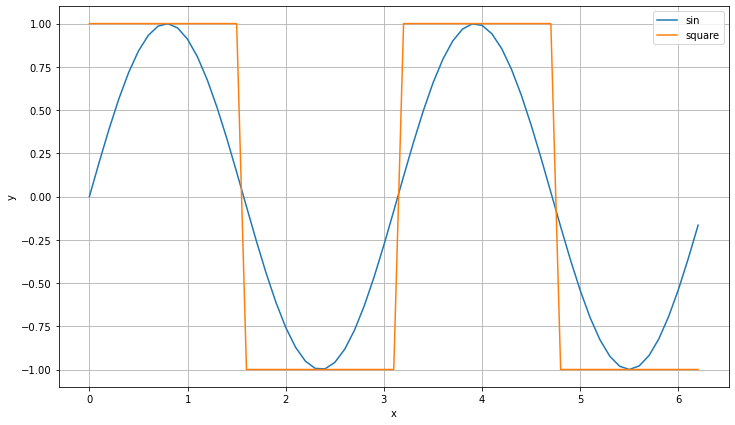

In [3]:
plot_2d_function(
    dfs=[sin_df, square_df],
    function_names=['sin', 'square'],
    path=img_path + 'periodic_functions'
)

For a varying number of RBF nodes, please place them by hand in the input space according to your judgement, and set the
same variance to each node.

In [4]:
rbf_locations = np.asarray([np.pi * k/4 for k in range(9) if k%2 != 0]).reshape((4, 1))
rbf_scale = np.pi/2

Next, apply your batch learning algorithm on your
training set to adjust the output weights and test accordingly on the hold-out
set.

In [5]:
rbf_network = RBFNetwork(
    rbf_locations=rbf_locations,
    rbf_scale=rbf_scale,
    max_iterations=1000,
    learning_rule='least_squares'
)

rbf_network.fit(sin_df[['x']].to_numpy(), sin_df[['y']].to_numpy())

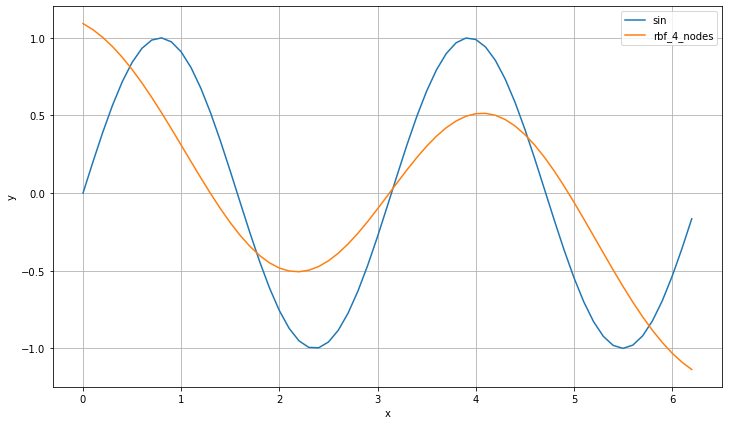

In [6]:
plot_2d_function(
    dfs=[sin_df],
    function_names=['sin'],
    models=[rbf_network],
    names=['rbf_4_nodes'],
    path=img_path + 'sin_prediction'
)

